# Asphalt mix prediction after plastic addition

In [179]:
#%% IMPORTS
import types
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from scipy.stats import normaltest
from scipy import stats
pd.set_option('display.max_columns', None)

Data Import 

In [180]:
#%%DATA READING AND INITIAL PREPROCESSING
numericColumns = ['Aggregate absorption [%]',
                  'Apparent specific gravity',
                    0.075,
                    0.3,
                    0.6,
                    2.36,
                    4.75,
                    9.5,
                    12.5,
                    19,
                    'Plastic particle size (mm)',
                    'Mixing speed (RPM)',
                    'Mixing Temperature',
                    'Mixing Time (hours)',
                    'Plastic Addition by bitumen weight (%)',
                    ]
categoricalColumns = ['Modified asphaly Mix?',
                      'Agreggate Type',
                    'Aggregate absorption [%]',
                    'Filler used',
                    'Consolidated bitumen penetration grade',
                    'New Plastic Type',
                    'Plastic pretreatment',
                    'Plastic shape',
                    'Plastic Size',
                    'Mixing Process',
                    'Plastic melted previous to addition?',
                    'Aggregates replacement ?',
                    'Bitumen replacement?',
                    'Filler replacement',
                    'Property',
                    'Units']
#It returns the dataframe of interes based on the property - 'AirVoids', 'MS', 'MF', 'ITS', 'TSR'
def returnDf (propertyOfInterest):
    df = pd.read_excel('fileML.xlsx', sheet_name = propertyOfInterest, engine='openpyxl')
    df = df.set_index(propertyOfInterest + ' ID')
    df.loc[:,:'Units'] = df.loc[:,:'Units'].applymap(str)
    df.loc[:,:'Units'] = df.loc[:,:'Units'] .applymap(str.strip)
    df.replace('NS', np.nan, inplace = True)
    df[numericColumns] = df[numericColumns].replace('N/a', 0).astype(float)
    return df

In [181]:
dfAirVoids = returnDf('AirVoids')
dfMS = returnDf('AirVoids')
dfMF = returnDf('MF')
dfITS = returnDf('ITS')
dfTSR = returnDf('TSR')

-------------------------------
#  1. Air Voids

## 1.1 Data Exploration

In [182]:
#Eliminate Outliers
Q1 = dfAirVoids["Air voids of the sample (%)"].quantile(0.25)
Q3 = dfAirVoids["Air voids of the sample (%)"].quantile(0.75)
IQR = Q3 - Q1
dfAirVoids = dfAirVoids[(dfAirVoids["Air voids of the sample (%)"] < (Q3 + 1.5 * IQR)) & (dfAirVoids["Air voids of the sample (%)"] > (Q1 - 1.5 * IQR))]
dfAirVoids.shape

(288, 34)

###  1.1.1 Total Sample

In [183]:
dfAirVoids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 1 to 305
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Global ID                               288 non-null    object 
 1   Modified asphaly Mix?                   288 non-null    object 
 2   Agreggate Type                          197 non-null    object 
 3   Aggregate absorption [%]                231 non-null    float64
 4   Apparent specific gravity               77 non-null     float64
 5   0.075                                   254 non-null    float64
 6   0.3                                     254 non-null    float64
 7   0.6                                     251 non-null    float64
 8   2.36                                    258 non-null    float64
 9   4.75                                    258 non-null    float64
 10  9.5                                     251 non-null    float6

In [184]:
columnsOfInteres = numericColumns[0:2]+numericColumns[10:]+['Air voids of the sample (%)']

In [199]:
dfAirVoids.describe(include = "all")

Global ID Modified asphaly Mix? Agreggate Type  \
count        288                   288            197   
unique       288                     2              7   
top          320                   Yes        Granite   
freq           1                   228             97   
mean         NaN                   NaN            NaN   
std          NaN                   NaN            NaN   
min          NaN                   NaN            NaN   
25%          NaN                   NaN            NaN   
50%          NaN                   NaN            NaN   
75%          NaN                   NaN            NaN   
max          NaN                   NaN            NaN   

        Aggregate absorption [%]  Apparent specific gravity       0.075  \
count                 231.000000                  77.000000  254.000000   
unique                       NaN                        NaN         NaN   
top                          NaN                        NaN         NaN   
freq                         NaN                        NaN         NaN   
mean                    1.090281                   2.705195    5.450787   
std                     0.888070                   0.066564    1.376229   
min                     0.130000                   2.590000    2.190000   
25%                     0.470000                   2.650000    4.620000   
50%                     0.990000                   2.710000    5.280000   
75%                     1.200000                   2.740000    5.980000   
max                     3.040000                   2.800000   10.300000   

               0.3         0.6        2.36        4.75         9.5  \
count   254.000000  251.000000  258.000000  258.000000  251.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     13.033189   19.983665   35.683721   47.867287   66.346653   
std       3.533186    6.327548    7.182231    9.232061   10.580957   
min       5.300000   10.070000   20.000000   24.000000   47.000000   
25%      10.150000   14.770000   29.850000   41.540000   59.850000   
50%      12.500000   19.780000   35.370000   46.150000   60.510000   
75%      14.470000   21.250000   38.800000   51.240000   70.610000   
max      24.500000   39.160000   54.100000   71.080000   96.870000   

              12.5          19      Filler used  \
count   243.000000  258.000000              122   
unique         NaN         NaN                4   
top            NaN         NaN  Portland Cement   
freq           NaN         NaN               49   
mean     77.845597   91.334884              NaN   
std      11.333933    7.402693              NaN   
min      66.630000   83.110000              NaN   
25%      69.380000   84.460000              NaN   
50%      69.380000   90.610000              NaN   
75%      87.740000  100.000000              NaN   
max     100.000000  100.020000              NaN   

       Bitumen Type Penetration Grade Consolidated bitumen penetration grade  \
count                             288                                    288   
unique                              6                                      3   
top                             50/70                                  50/70   
freq                              113                                    201   
mean                              NaN                                    NaN   
std                               NaN                                    NaN   
min                               NaN                                    NaN   
25%                               NaN                                    NaN   
50%                               NaN                                    NaN   
75%                               NaN                                    NaN   
max                               NaN                                    NaN   

      

In total, there is $\color{red}{\text{288}}$ observations. Let's see if there is any correlation with the continual and categorical variables.

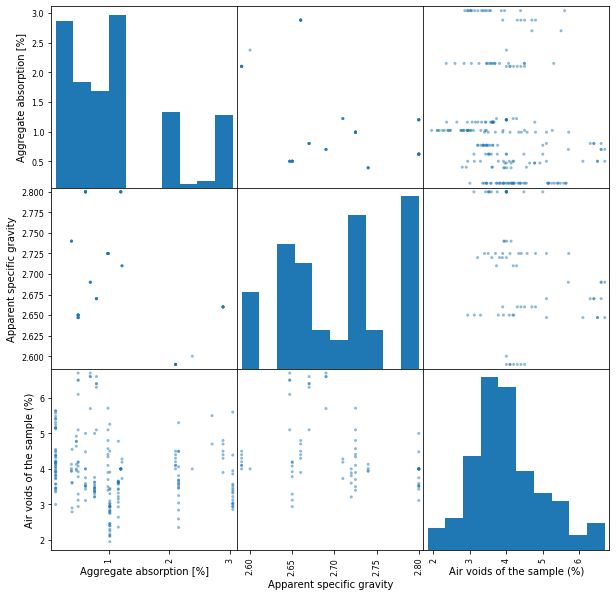

In [186]:
scatter_matrix(dfAirVoids[['Aggregate absorption [%]', 'Apparent specific gravity', 'Air voids of the sample (%)']], figsize=(10, 10))
plt.show()

Among the categorical variables, we will initially focus on the general ones that might have an effect on air voids: $\color{red}{\text{Aggregate type}}$, $\color{red}{\text{Filler used}}$ and $\color{red}{\text{Bitumen Grade}}$

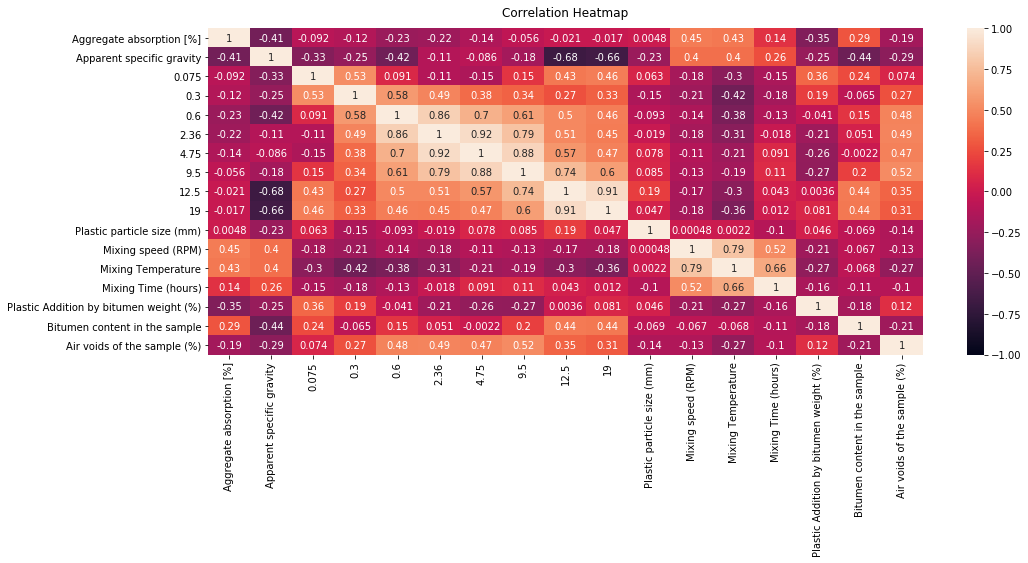

In [187]:
#CORRELATION:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dfAirVoids.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

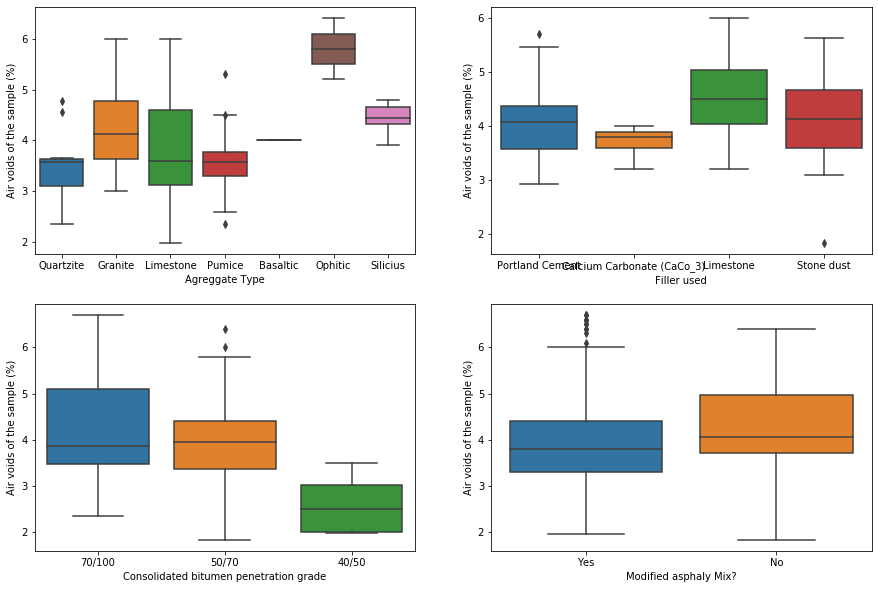

In [188]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
sns.boxplot(y="Air voids of the sample (%)", x= "Agreggate Type", data=dfAirVoids,  orient='v' , ax=ax1)
sns.boxplot(y="Air voids of the sample (%)", x= "Filler used", data=dfAirVoids,  orient='v' , ax=ax2)
sns.boxplot(y="Air voids of the sample (%)", x= "Consolidated bitumen penetration grade", data=dfAirVoids,  orient='v' , ax=ax3)
sns.boxplot(y="Air voids of the sample (%)", x= "Modified asphaly Mix?", data=dfAirVoids,  orient='v' , ax=ax4)

Within the  $\color{red}{\text{Aggregate type}}$, although it exists differences -especially with the Ophitic- this data migh not be robust enough due to the sample size of this type of aggregate. It happens the same with the  $\color{red}{\text{Bitumen type}}$, where only  $\color{purple}{\text{5}}$ observations used the 40/50 bitumen. The  $\color{red}{\text{addition of plastic}}$ seems to have not strong influence in the air voids.

###  1.1.2 Modified mixtures

In [189]:
dfAirVoidsModified = dfAirVoids[dfAirVoids['Modified asphaly Mix?']=='Yes']
dfAirVoidsModified.describe(include = "all")

Global ID Modified asphaly Mix? Agreggate Type  \
count        228                   228            162   
unique       228                     1              7   
top         1190                   Yes        Granite   
freq           1                   228             81   
mean         NaN                   NaN            NaN   
std          NaN                   NaN            NaN   
min          NaN                   NaN            NaN   
25%          NaN                   NaN            NaN   
50%          NaN                   NaN            NaN   
75%          NaN                   NaN            NaN   
max          NaN                   NaN            NaN   

        Aggregate absorption [%]  Apparent specific gravity       0.075  \
count                 184.000000                  56.000000  201.000000   
unique                       NaN                        NaN         NaN   
top                          NaN                        NaN         NaN   
freq                         NaN                        NaN         NaN   
mean                    1.107011                   2.699964    5.498607   
std                     0.900510                   0.066549    1.347934   
min                     0.130000                   2.590000    2.190000   
25%                     0.470000                   2.650000    4.620000   
50%                     0.990000                   2.690000    5.280000   
75%                     1.200000                   2.740000    5.980000   
max                     3.040000                   2.800000   10.300000   

               0.3         0.6        2.36        4.75         9.5  \
count   201.000000  198.000000  204.000000  204.000000  198.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     13.097910   19.899646   35.367647   47.635294   66.047929   
std       3.518913    6.361360    7.213825    9.377532   10.582683   
min       5.300000   10.070000   20.000000   24.000000   47.000000   
25%      10.150000   14.770000   29.850000   41.540000   59.850000   
50%      12.970000   19.780000   35.370000   46.150000   60.510000   
75%      14.470000   21.137500   36.895000   51.350000   70.480000   
max      24.500000   39.160000   54.100000   71.080000   96.870000   

              12.5          19      Filler used  \
count   195.000000  204.000000               93   
unique         NaN         NaN                4   
top            NaN         NaN  Portland Cement   
freq           NaN         NaN               38   
mean     77.605846   90.962892              NaN   
std      11.553937    7.531754              NaN   
min      66.630000   83.110000              NaN   
25%      69.380000   84.460000              NaN   
50%      69.380000   84.460000              NaN   
75%      87.740000  100.000000              NaN   
max     100.000000  100.020000              NaN   

       Bitumen Type Penetration Grade Consolidated bitumen penetration grade  \
count                             228                                    228   
unique                              6                                      3   
top                             50/70                                  50/70   
freq                               90                                    157   
mean                              NaN                                    NaN   
std                               NaN                                    NaN   
min                               NaN                                    NaN   
25%                               NaN                                    NaN   
50%                               NaN                                    NaN   
75%                               NaN                                    NaN   
max                               NaN                                    NaN   

      

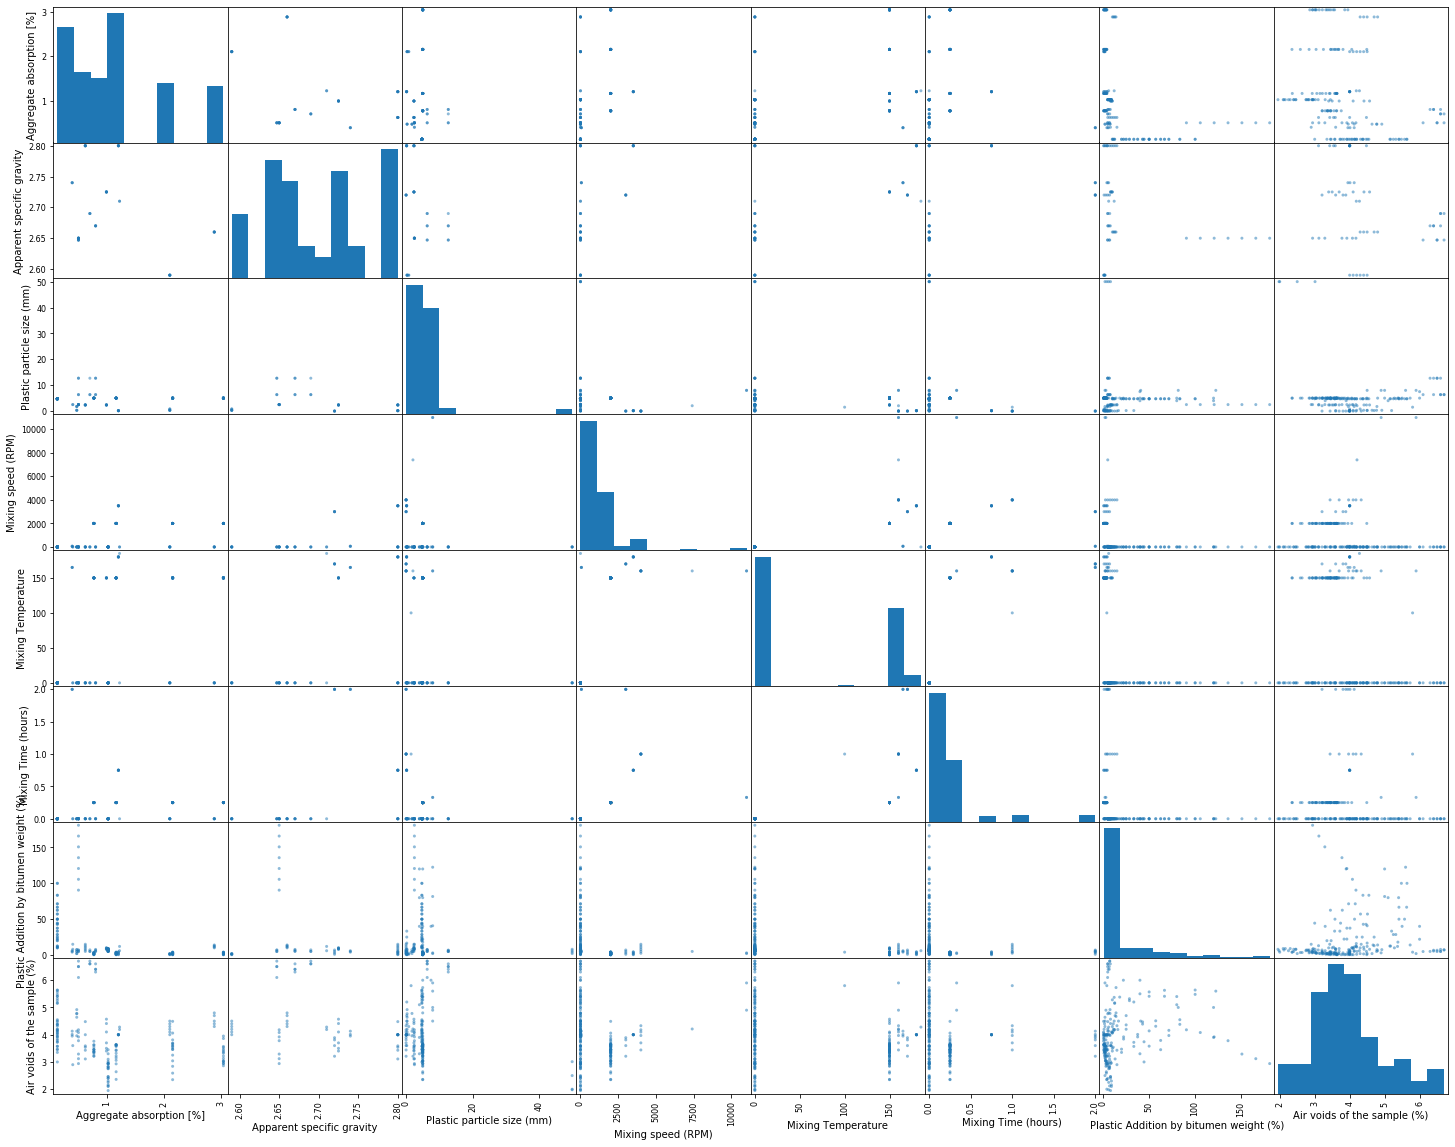

In [190]:
scatter_matrix(dfAirVoidsModified[columnsOfInteres], figsize=(25, 20))
plt.show()

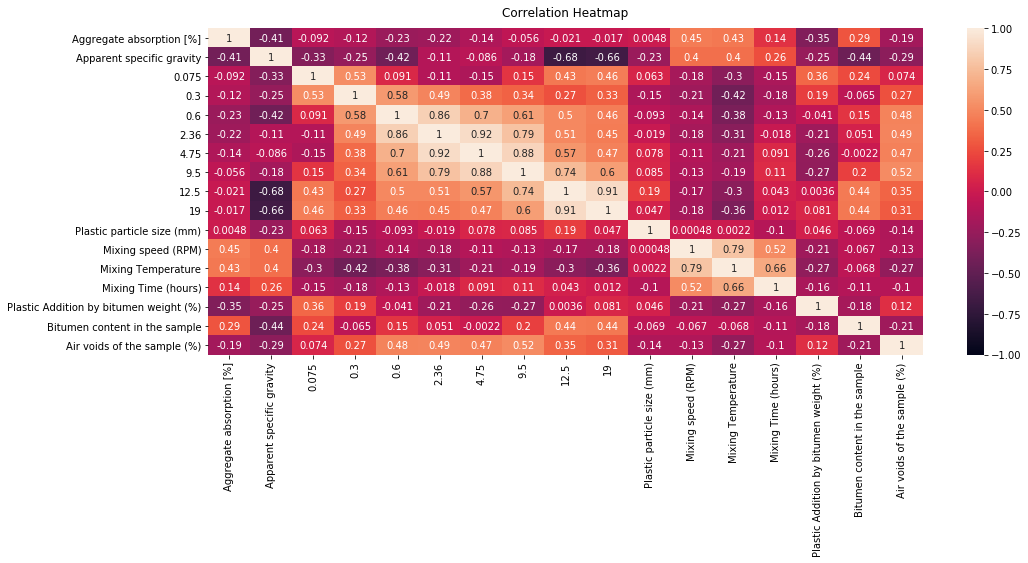

In [191]:
#CORRELATION:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dfAirVoids.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
sns.boxplot(y="Air voids of the sample (%)", x= "Agreggate Type", data=dfAirVoidsModified,  orient='v' , ax=ax1)
sns.boxplot(y="Air voids of the sample (%)", x= "Plastic shape", data=dfAirVoidsModified,  orient='v' , ax=ax2)
sns.boxplot(y="Air voids of the sample (%)", x= "New Plastic Type", data=dfAirVoidsModified,  orient='v' , ax=ax3)
sns.boxplot(y="Air voids of the sample (%)", x= "Mixing Process", data=dfAirVoidsModified,  orient='v' , ax=ax4)

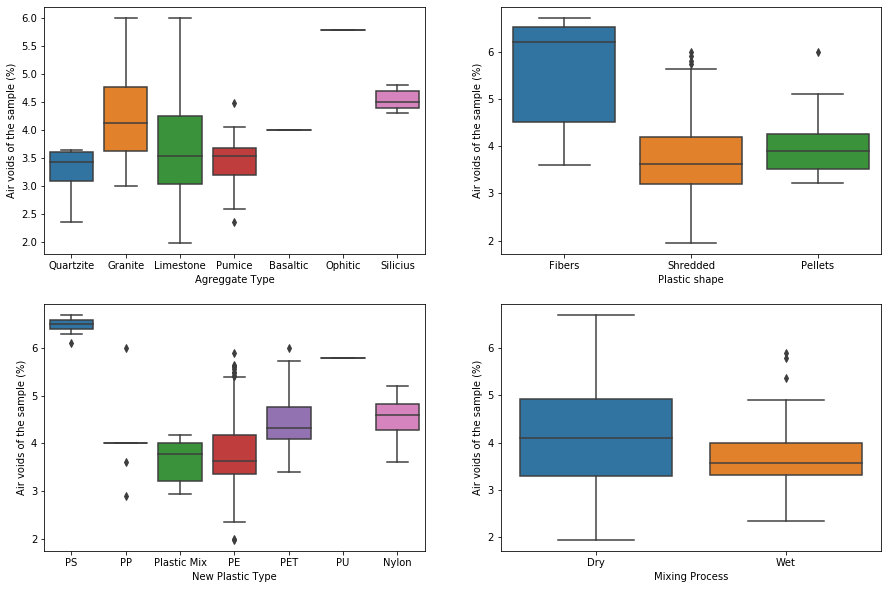

In [192]:
Not much difference among dry and wet

###  1.1.3 Wet vs. Dry Mixing

In [193]:
dfAirVoidsWetvsDry = dfAirVoidsModified [['Mixing Process', 'Air voids of the sample (%)']]
dfAirVoidsWetvsDry.groupby(['Mixing Process'], as_index=False).describe()

Air voids of the sample (%)                                               \
                        count      mean       std   min   25%   50%    75%   
0                       133.0  4.162256  1.185640  1.95  3.30  4.10  4.920   
1                        95.0  3.641895  0.604626  2.35  3.32  3.57  3.985   

        
   max  
0  6.7  
1  5.9

C:\Users\cavs1\Anaconda3\envs\MLDeepLearning\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cavs1\Anaconda3\envs\MLDeepLearning\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\cavs1\Anaconda3\envs\MLDeepLearning\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


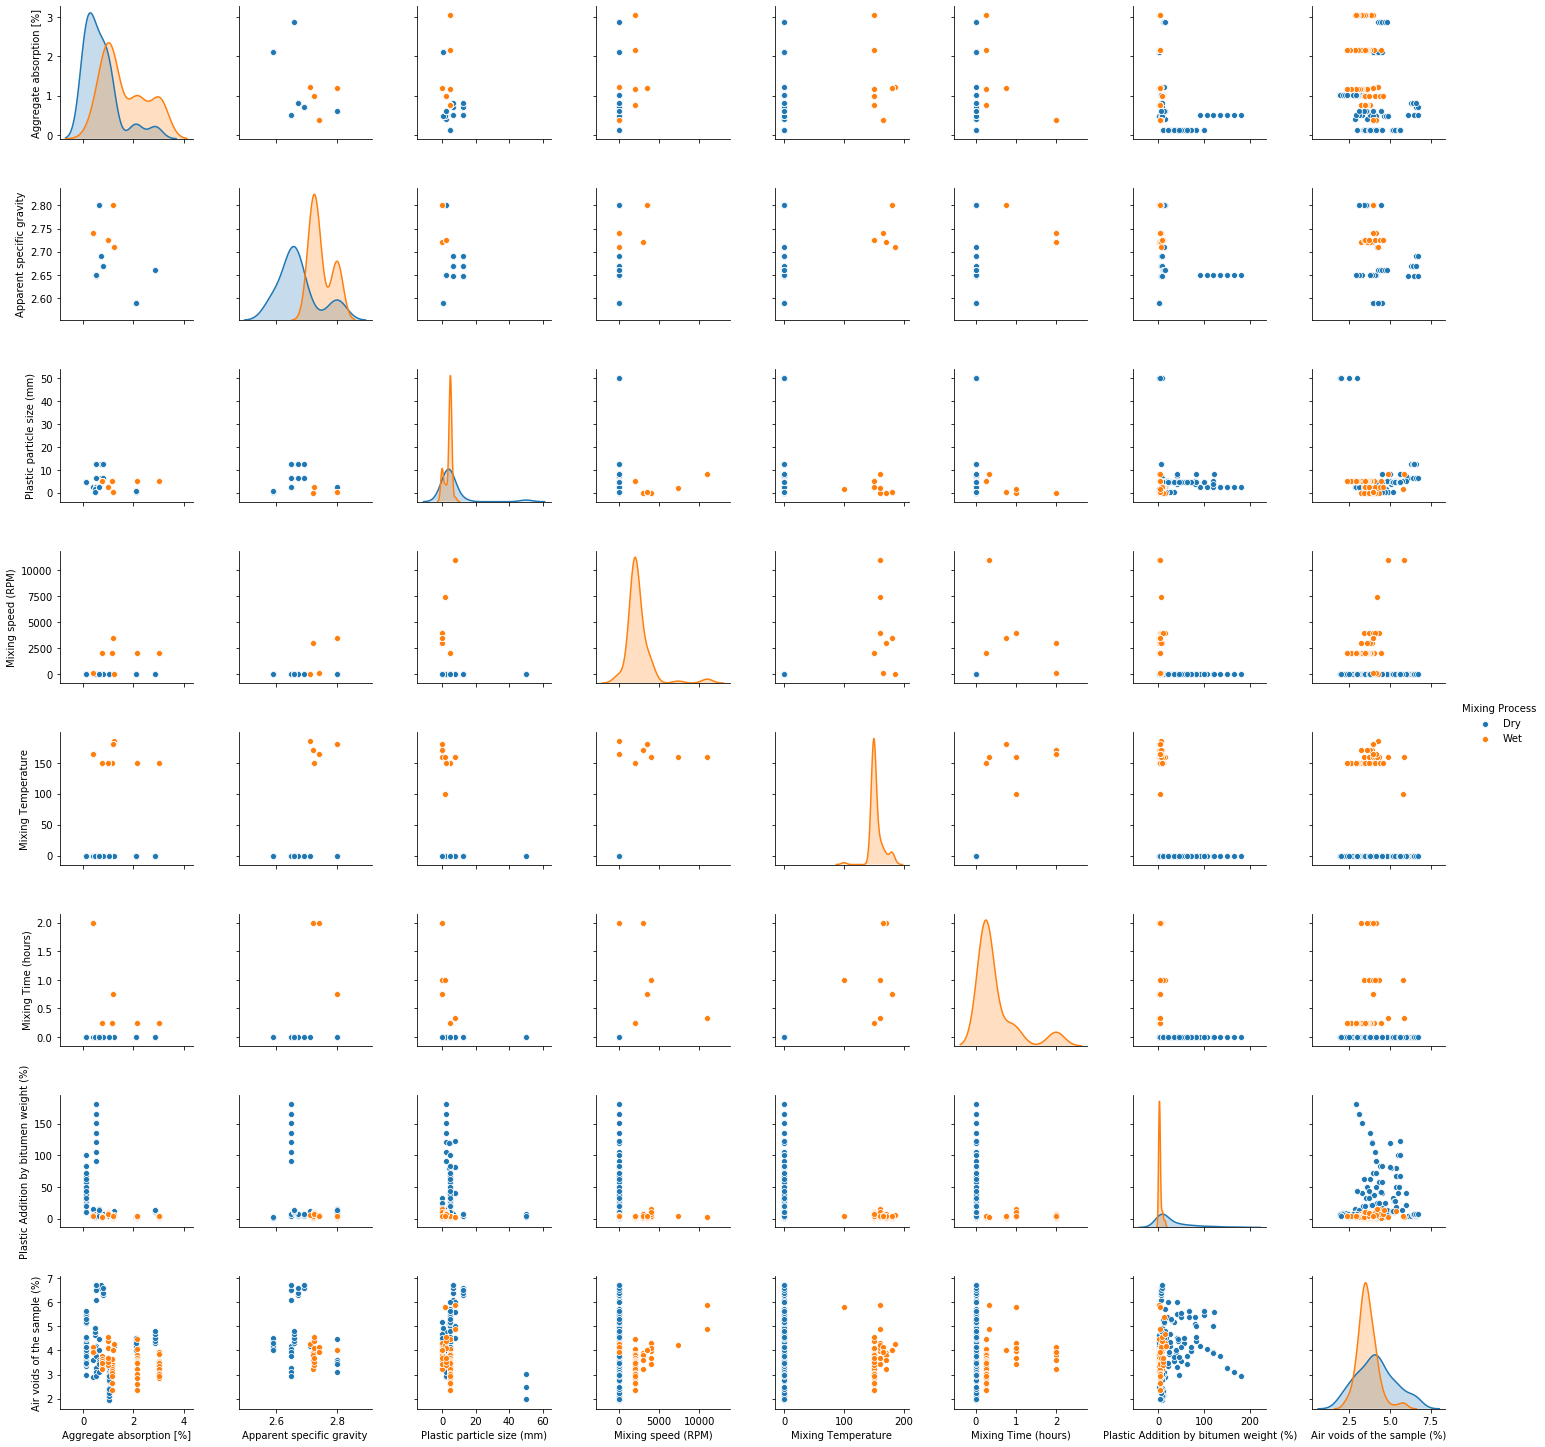

In [194]:
sns.pairplot(dfAirVoidsModified[columnsOfInteres+['Mixing Process']], hue="Mixing Process", height=2.5)

##  **Some important points:**

*   There are missing values mainly in $\color{red}{\text{Apparent specific gravity}}$, $\color{red}{\text{Aggregate type}}$ and $\color{red}{\text{filler used}}$.
*   Total sample: # observations = 288, Mean = 4, Standard deviation = 0.98 
*   Sample with asphalt modified: # observations = 228, Mean = 3.94, Standard deviation = 1.017
*   It seems that there will be a strong correlation with $\color{red}{\text{Aggregates gradation}}$.
*   Dry vs. Wet:
    *   Not strong difference between dry and wet.
    *   Mean in wet = 3.64, Mean in dry = 4.16.


## 1.2 Data Pre-processing

In [195]:
dfAirVoids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 1 to 305
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Global ID                               288 non-null    object 
 1   Modified asphaly Mix?                   288 non-null    object 
 2   Agreggate Type                          197 non-null    object 
 3   Aggregate absorption [%]                231 non-null    float64
 4   Apparent specific gravity               77 non-null     float64
 5   0.075                                   254 non-null    float64
 6   0.3                                     254 non-null    float64
 7   0.6                                     251 non-null    float64
 8   2.36                                    258 non-null    float64
 9   4.75                                    258 non-null    float64
 10  9.5                                     251 non-null    float6


### 1.2.1 Missing Values


In [198]:
dfAirVoidsCleaned = dfAirVoids.drop(['Global ID','Agreggate Type', 'Apparent specific gravity', 'Filler used', 'Property', 'Units'], axis = 1)

In [201]:
dfAirVoidsCleaned = pd.get_dummies(dfAirVoidsCleaned)

In [203]:
dfAirVoidsCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 1 to 305
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Aggregate absorption [%]                       231 non-null    float64
 1   0.075                                          254 non-null    float64
 2   0.3                                            254 non-null    float64
 3   0.6                                            251 non-null    float64
 4   2.36                                           258 non-null    float64
 5   4.75                                           258 non-null    float64
 6   9.5                                            251 non-null    float64
 7   12.5                                           243 non-null    float64
 8   19                                             258 non-null    float64
 9   Plastic particle size (mm)                     251 non

---------------------------------
###  2.2 Marshall Stability

In [6]:
dfMS.describe(include = "all")

Global ID Modified asphaly Mix? Agreggate Type  \
count        305                   305            205   
unique       305                     2              7   
top          333                   Yes        Granite   
freq           1                   241             99   
mean         NaN                   NaN            NaN   
std          NaN                   NaN            NaN   
min          NaN                   NaN            NaN   
25%          NaN                   NaN            NaN   
50%          NaN                   NaN            NaN   
75%          NaN                   NaN            NaN   
max          NaN                   NaN            NaN   

        Aggregate absorption [%]  Apparent specific gravity       0.075  \
count                 237.000000                  79.000000  269.000000   
unique                       NaN                        NaN         NaN   
top                          NaN                        NaN         NaN   
freq                         NaN                        NaN         NaN   
mean                    1.113819                   2.706203    5.367472   
std                     0.901977                   0.066591    1.437309   
min                     0.130000                   2.590000    2.190000   
25%                     0.470000                   2.650000    4.620000   
50%                     0.990000                   2.710000    5.280000   
75%                     1.200000                   2.740000    5.980000   
max                     3.040000                   2.800000   10.300000   

              0.3         0.6        2.36        4.75         9.5        12.5  \
count   269.00000  266.000000  273.000000  273.000000  266.000000  258.000000   
unique        NaN         NaN         NaN         NaN         NaN         NaN   
top           NaN         NaN         NaN         NaN         NaN         NaN   
freq          NaN         NaN         NaN         NaN         NaN         NaN   
mean     13.03803   20.222218   36.018864   48.102527   66.324812   78.130116   
std       3.44642    6.382403    7.256635    9.094616   10.704868   11.154531   
min       5.30000   10.070000   20.000000   24.000000   47.000000   66.630000   
25%      10.15000   14.770000   29.850000   41.540000   59.850000   69.380000   
50%      12.97000   19.780000   35.370000   46.150000   60.510000   78.000000   
75%      14.47000   21.250000   38.800000   50.910000   70.610000   87.740000   
max      24.50000   39.160000   54.100000   71.080000   96.870000  100.000000   

                19 Filler used Bitumen Type Penetration Grade  \
count   273.000000         132                            305   
unique         NaN           4                              6   
top            NaN  Stone dust                          50/70   
freq           NaN          53                            119   
mean     91.661172         NaN                            NaN   
std       7.346771         NaN                            NaN   
min      83.110000         NaN                            NaN   
25%      84.460000         NaN                            NaN   
50%      94.520000         NaN                            NaN   
75%     100.000000         NaN                            NaN   
max     100.020000         NaN                            NaN   

       New Plastic Type Plastic pretreatment Plastic shape Plastic Size  \
count               281                  305           299          261   
unique                9                    2             4            4   
top                  PE             Physical      Shredded         Fine   
freq                135                  241           198           95   
mean                NaN                  NaN           NaN          NaN   
std                 NaN                  NaN           NaN          NaN   
min                 NaN                  NaN           NaN          NaN   
25%                 NaN                  NaN           NaN         

In [7]:
dfMF.describe(include = "all")


Global ID Modified asphaly Mix? Agreggate Type  \
count        316                   316            165   
unique       316                     2              6   
top          476                   Yes        Granite   
freq           1                   241             91   
mean         NaN                   NaN            NaN   
std          NaN                   NaN            NaN   
min          NaN                   NaN            NaN   
25%          NaN                   NaN            NaN   
50%          NaN                   NaN            NaN   
75%          NaN                   NaN            NaN   
max          NaN                   NaN            NaN   

        Aggregate absorption [%]  Apparent specific gravity       0.075  \
count                 177.000000                  88.000000  236.000000   
unique                       NaN                        NaN         NaN   
top                          NaN                        NaN         NaN   
freq                         NaN                        NaN         NaN   
mean                    0.993870                   2.673068    6.988517   
std                     0.863027                   0.068539    6.125960   
min                     0.130000                   2.590000    2.190000   
25%                     0.130000                   2.600000    5.000000   
50%                     0.800000                   2.660000    5.280000   
75%                     1.020000                   2.725000    7.000000   
max                     2.880000                   2.800000   33.270000   

               0.3         0.6        2.36        4.75         9.5  \
count   286.000000  255.000000  266.000000  286.000000  255.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     16.398916   22.645882   39.519962   51.168811   71.422235   
std       5.649320    6.642961    7.852056    9.291784   12.750606   
min       5.300000    9.000000   20.000000   24.000000   47.000000   
25%      12.970000   18.900000   35.370000   46.150000   60.510000   
50%      14.470000   20.800000   36.780000   50.130000   70.480000   
75%      20.000000   22.820000   46.150000   54.830000   78.840000   
max      35.940000   39.160000   57.460000   71.500000   96.870000   

              12.5          19 Filler used Bitumen Type Penetration Grade  \
count   271.000000  286.000000         153                            316   
unique         NaN         NaN           4                              5   
top            NaN         NaN  Stone dust                          50/70   
freq           NaN         NaN          84                            121   
mean     84.181402   94.800455         NaN                            NaN   
std      11.643557    6.610549         NaN                            NaN   
min      66.840000   83.320000         NaN                            NaN   
25%      78.165000   89.220000         NaN                            NaN   
50%      81.420000  100.000000         NaN                            NaN   
75%      95.000000  100.000000         NaN                            NaN   
max     100.000000  100.020000         NaN                            NaN   

       New Plastic Type Plastic pretreatment Plastic shape Plastic Size  \
count               291                  316           300          241   
unique               11                    2             4            4   
top                  PE             Physical      Shredded         Fine   
freq                 79                  241           186          126   
mean                NaN                  NaN           NaN          NaN   
std                 NaN                  NaN           NaN          NaN   
min                 NaN                  NaN           NaN          NaN   
25%                 NaN                  NaN           

In [8]:
dfITS.describe(include = "all")


Global ID Modified asphaly Mix? Agreggate Type  \
count        129                   129             63   
unique       129                     2              4   
top         1121                   Yes      Limestone   
freq           1                   110             36   
mean         NaN                   NaN            NaN   
std          NaN                   NaN            NaN   
min          NaN                   NaN            NaN   
25%          NaN                   NaN            NaN   
50%          NaN                   NaN            NaN   
75%          NaN                   NaN            NaN   
max          NaN                   NaN            NaN   

        Aggregate absorption [%]  Apparent specific gravity       0.075  \
count                  97.000000                  57.000000  122.000000   
unique                       NaN                        NaN         NaN   
top                          NaN                        NaN         NaN   
freq                         NaN                        NaN         NaN   
mean                    0.983247                   2.665000    6.116066   
std                     0.950245                   0.060433    1.627602   
min                     0.100000                   2.600000    2.990000   
25%                     0.100000                   2.600000    4.990000   
50%                     0.560000                   2.670000    5.980000   
75%                     2.375000                   2.720000    7.000000   
max                     2.700000                   2.800000    9.700000   

               0.3         0.6        2.36        4.75         9.5  \
count   122.000000  126.000000  126.000000  126.000000  126.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     14.097295   22.896667   38.064048   51.950397   73.278016   
std       2.674193    7.221411    9.792363   11.291319   10.515073   
min       5.300000   10.070000   19.770000   23.950000   47.000000   
25%      12.410000   18.270000   33.000000   49.540000   65.000000   
50%      13.750000   21.250000   35.860000   52.000000   70.490000   
75%      16.280000   28.000000   47.000000   54.830000   77.500000   
max      23.000000   39.160000   54.100000   71.080000   96.870000   

              12.5          19 Filler used Bitumen Type Penetration Grade  \
count   126.000000  126.000000          34                            129   
unique         NaN         NaN           5                              6   
top            NaN         NaN   Limestone                          60/70   
freq           NaN         NaN          13                             63   
mean     87.054286   95.633492         NaN                            NaN   
std       8.868583    5.131707         NaN                            NaN   
min      73.040000   89.000000         NaN                            NaN   
25%      79.895000   89.220000         NaN                            NaN   
50%      81.420000  100.000000         NaN                            NaN   
75%      95.885000  100.000000         NaN                            NaN   
max     100.000000  100.000000         NaN                            NaN   

       New Plastic Type Plastic pretreatment Plastic shape Plastic Size  \
count               129                  129           123           97   
unique                7                    2             4            4   
top                  PE             Physical      Shredded         Fine   
freq                 42                  110            71           54   
mean                NaN                  NaN           NaN          NaN   
std                 NaN                  NaN           NaN          NaN   
min                 NaN                  NaN           NaN          NaN   
25%                 NaN                  NaN           

In [9]:
dfTSR.describe(include = "all")

Global ID Modified asphaly Mix? Agreggate Type  \
count        147                   147             95   
unique       147                     2              8   
top         1161                   Yes        Granite   
freq           1                   117             38   
mean         NaN                   NaN            NaN   
std          NaN                   NaN            NaN   
min          NaN                   NaN            NaN   
25%          NaN                   NaN            NaN   
50%          NaN                   NaN            NaN   
75%          NaN                   NaN            NaN   
max          NaN                   NaN            NaN   

        Aggregate absorption [%]  Apparent specific gravity       0.075  \
count                 109.000000                  40.000000  140.000000   
unique                       NaN                        NaN         NaN   
top                          NaN                        NaN         NaN   
freq                         NaN                        NaN         NaN   
mean                    0.868349                   2.719375    5.582643   
std                     0.783561                   0.055245    1.588844   
min                     0.100000                   2.647000    2.860000   
25%                     0.340000                   2.670000    4.620000   
50%                     0.700000                   2.720000    5.650000   
75%                     1.070000                   2.755000    7.000000   
max                     3.040000                   2.800000    9.700000   

               0.3         0.6        2.36        4.75         9.5  \
count   140.000000  144.000000  144.000000  144.000000  144.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     12.885643   21.939653   36.600833   51.278542   72.737431   
std       3.756778    8.136243    8.152016   10.083729   11.154710   
min       7.030000   10.070000   19.770000   23.950000   47.000000   
25%      10.150000   14.770000   30.730000   43.880000   65.000000   
50%      13.010000   20.905000   34.410000   52.000000   69.970000   
75%      14.000000   28.000000   38.800000   54.830000   79.950000   
max      23.000000   39.160000   54.100000   71.080000   96.870000   

              12.5          19 Filler used Bitumen Type Penetration Grade  \
count   144.000000  144.000000          40                            147   
unique         NaN         NaN           5                              6   
top            NaN         NaN   Limestone                          60/70   
freq           NaN         NaN          19                             66   
mean     85.431250   95.244306         NaN                            NaN   
std      10.187277    6.387864         NaN                            NaN   
min      66.630000   83.110000         NaN                            NaN   
25%      80.000000   89.000000         NaN                            NaN   
50%      84.580000   99.870000         NaN                            NaN   
75%      94.910000  100.000000         NaN                            NaN   
max     100.000000  100.020000         NaN                            NaN   

       New Plastic Type Plastic pretreatment Plastic shape Plastic Size  \
count               147                  147           141          121   
unique                7                    2             4            4   
top                  PE             Physical      Shredded         Fine   
freq                 69                  117            84           54   
mean                NaN                  NaN           NaN          NaN   
std                 NaN                  NaN           NaN          NaN   
min                 NaN                  NaN           NaN          NaN   
25%                 NaN                  NaN           